In [186]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [187]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [188]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [189]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [190]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [191]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [192]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [193]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [194]:
# Find the most recent date in the data set.
session.query(Measurement).order_by(Measurement.date.desc()).first().date

'2017-08-23'

<AxesSubplot:xlabel='date'>

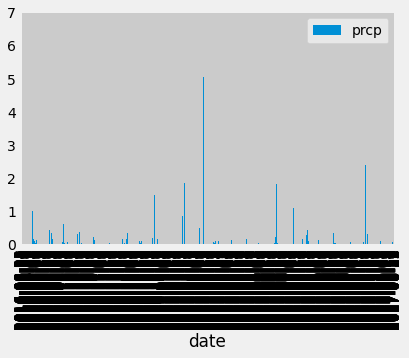

In [236]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
max_date = session.query(func.max(Measurement.date)).first()[0]
# convert string to date object
max_date = dt.datetime.strptime(max_date, '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
year_ago = max_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,
       Measurement.prcp,
      ]
year_measurements = session.query(*sel).filter(Measurement.date >= year_ago).order_by(Measurement.date.asc()).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(year_measurements, columns=['date','prcp'])


#Sort the dataframe by date
df.sort_values('date', inplace=True)
df.set_index('date', inplace=True)
df.plot.bar()
#(figsize=(40,20))





Text(0, 0.5, 'Inches')

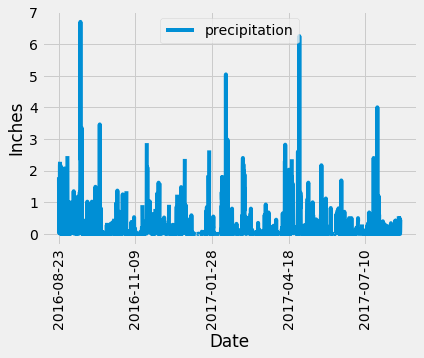

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [87]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Preciptation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [92]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measurement).group_by(Measurement.station).count()
station_count


9

In [197]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

sel = [Measurement.station,
       func.count(Measurement.station)
      ]

active_stations = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [198]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_stat_id = active_stations[0][0]
active_stat_id





'USC00519281'

In [199]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)
      ]

stats = session.query(*sel).filter(Measurement.station == active_stat_id).all()
stats

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

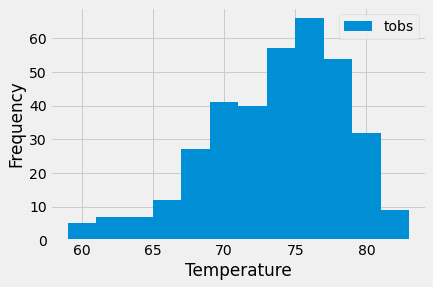

In [203]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_date2 = session.query(func.max(Measurement.date)).filter(Measurement.station == active_stat_id).first()[0]

# convert string to date object
max_date2 = dt.datetime.strptime(max_date2, '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
year_ago2 = max_date2 - dt.timedelta(days=365)

sel2 = [
       Measurement.tobs
     ]
active_station_year_data = session.query(*sel2).filter(Measurement.station == active_stat_id,Measurement.date >= year_ago2).all()
df2 = pd.DataFrame(active_station_year_data,columns=['tobs'])

# df2.sort_values('tobs').head(20)
df2.plot.hist('tobs',bins=12)
plt.xlabel("Temperature")


# Close Session

In [16]:
session.close()